In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from src.model import *
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import matplotlib.pyplot as plt

In [138]:
labels = get_high_prescribers('data/heme-onc_d_16.csv', 'IMBRUVICA')

In [146]:
df = pd.read_csv('data/heme-onc_d_15.csv', delimiter='\t')

In [320]:
df.shape

(233746, 105)

In [384]:
df2 = pd.read_csv('data/heme-onc_d_15.csv', delimiter='\t')

df2 = df2[['npi', 'generic_drug_cost', 'mapd_drug_cost', 'pdp_drug_cost', 'lis_drug_cost',
       'nonlis_drug_cost', 'opioid_claim_count', 'opioid_drug_cost',
       'er_opioid_drug_cost', 'er_opioid_prescriber_rate',
       'beneficiary_female_count', 'beneficiary_male_count',
       'beneficiary_average_risk_score',
       'antibiotic_claim_count',
       'antibiotic_bene_count', 'beneficiary_race_white_count','beneficiary_nondual_count']]

df2 = df2.drop_duplicates()

cols_fillna = ['generic_drug_cost', 'mapd_drug_cost', 'pdp_drug_cost', 'lis_drug_cost',
              'nonlis_drug_cost', 'opioid_drug_cost', 'er_opioid_drug_cost', 'er_opioid_prescriber_rate']
for col in cols_fillna:
    df2[col].fillna(df2[col].median(), inplace=True)

cols_fillna = ['opioid_claim_count', 'beneficiary_female_count', 'beneficiary_average_risk_score',
              'beneficiary_male_count', 'antibiotic_claim_count', 'antibiotic_bene_count',
              'beneficiary_race_white_count', 'beneficiary_nondual_count']
for col in cols_fillna:
    mask = df2[col].isnull()
    df2.loc[mask, col] = df2.loc[mask, col].apply(lambda v: np.random.choice(range(1,11)))

df2.set_index('npi', inplace=True)

In [385]:
X, y = get_Xy(df2, labels)

gbc = GradientBoostingClassifier()

cross_val_score(gbc, X, y, scoring='f1', cv=5).mean()

0.097463248133979843

In [371]:
y.shape

(11040,)

In [660]:
data_15 = clean_data('data/heme-onc_d_15.csv')

Reading file...
Creating new features...
Collapsing unecessary features...
Complete.


In [661]:
data_15.head()

,generic_drug_cost,mapd_drug_cost,pdp_drug_cost,lis_drug_cost,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,er_opioid_drug_cost,er_opioid_prescriber_rate,beneficiary_female_count,...,NINLARO_claims,NINLARO_HP,SUTENT_costs,SUTENT_claims,SUTENT_HP,XARELTO_costs,XARELTO_claims,XARELTO_HP,total_costs_all_drugs,overall_hp
npi,,,,,,,,,,,,,,,,,,,,,
1285697821,293020.90,89993.76,859998.42,562690.94,387301.24,788.0,16607.06,10623.12,169.0,260.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,741836.26,0.0
1174528921,34999.29,232360.85,1220401.33,102602.37,1350159.81,55.0,10884.48,373.52,18.0,74.0,...,25.0,0.0,236215.81,25.0,0.0,236215.81,25.0,0.0,1333817.20,1.0
1811982689,43351.34,110119.91,814494.50,13834.62,910779.79,100.0,4998.43,2230.50,41.0,99.0,...,11.0,0.0,107005.88,11.0,0.0,107005.88,11.0,0.0,799978.00,0.0
1861515546,44482.47,115583.76,1021989.16,197520.53,940052.39,219.0,9937.22,856.03,17.0,184.0,...,29.0,0.0,275264.42,29.0,0.0,275264.42,29.0,0.0,736672.45,0.0
1194725671,15418.47,227291.32,349729.33,33164.02,543856.63,119.0,9066.19,673.87,15.0,72.0,...,12.0,0.0,133624.45,12.0,0.0,133624.45,12.0,0.0,506922.97,0.0


In [586]:
X, y = get_Xy(data_15, labels)

In [587]:
gbc = GradientBoostingClassifier()

cross_val_score(gbc, X, y, scoring='precision', cv=5).mean()

0.36724745842392903

In [ ]:
# identify what percentage of doctors prescribe 80% of the drugs?

## New features based on drug information

In [486]:
X, y = get_Xy(data_15, labels)

partd_drugs = ['REVLIMID', 'IMBRUVICA', 'IBRANCE', 'JAKAFI', 'XTANDI', 'GLEEVEC',
       'ZYTIGA', 'POMALYST', 'TASIGNA', 'SPRYCEL', 'IMATINIB MESYLATE',
       'TARCEVA', 'AFINITOR', 'PROMACTA', 'PROCRIT', 'JADENU', 'NEXAVAR',
       'NINLARO', 'SUTENT', 'XARELTO']
               
npis = X.index.values
hp_features = pd.DataFrame(data=npis, columns=['npi']).set_index('npi')

for drug in partd_drugs:
    features = df.loc[df['drug_name'] == 'REVLIMID', ['npi', 'total_drug_cost', 'total_claim_count']].set_index('npi')
    
    # Create high prescriber feature per drug
    drug_hp = drug + '_HP' 
    features[drug_hp] = 0
    features.loc[features['total_drug_cost'] >= features['total_drug_cost'].quantile(0.75), drug_hp] = 1
    
    # rename columns
    drug_costs = drug + '_costs'
    drug_claims = drug + '_claims'
    features.rename(columns={'total_drug_cost': drug_costs, 'total_claim_count': drug_claims}, inplace=True)
    
    hp_features = hp_features.join(features)
    
# add feature for all drug costs
total_costs_all_drugs = pd.DataFrame(data=df.groupby('npi').sum()['total_drug_cost']).rename(columns={'total_drug_cost': 'total_costs_all_drugs'})
hp_features = hp_features.join(total_costs_all_drugs)

# add feature for high prescriber overall
hp_features['overall_hp'] = 0
hp_features.loc[hp_features['total_costs_all_drugs'] >= hp_features['total_costs_all_drugs'].quantile(0.75), 'overall_hp'] = 1

hp_features.fillna(0, inplace=True)
hp_features.drop_duplicates(inplace=True)

hp_features.head()

,REVLIMID_costs,REVLIMID_claims,REVLIMID_HP,IMBRUVICA_costs,IMBRUVICA_claims,IMBRUVICA_HP,IBRANCE_costs,IBRANCE_claims,IBRANCE_HP,JAKAFI_costs,...,NINLARO_claims,NINLARO_HP,SUTENT_costs,SUTENT_claims,SUTENT_HP,XARELTO_costs,XARELTO_claims,XARELTO_HP,total_costs_all_drugs,overall_hp
npi,,,,,,,,,,,,,,,,,,,,,
1003015207,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,2038.29,0
1003019571,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,13034.72,0
1003027764,885149.18,68.0,1.0,885149.18,68.0,1.0,885149.18,68.0,1.0,885149.18,...,68.0,1.0,885149.18,68.0,1.0,885149.18,68.0,1.0,1632218.87,1
1003031212,505540.87,51.0,1.0,505540.87,51.0,1.0,505540.87,51.0,1.0,505540.87,...,51.0,1.0,505540.87,51.0,1.0,505540.87,51.0,1.0,1349144.10,1
1003051871,123874.99,14.0,0.0,123874.99,14.0,0.0,123874.99,14.0,0.0,123874.99,...,14.0,0.0,123874.99,14.0,0.0,123874.99,14.0,0.0,1550079.54,1


In [306]:
X = X.join(hp_features, how='left')
X.fillna(0, inplace=True)

0.0911142940051


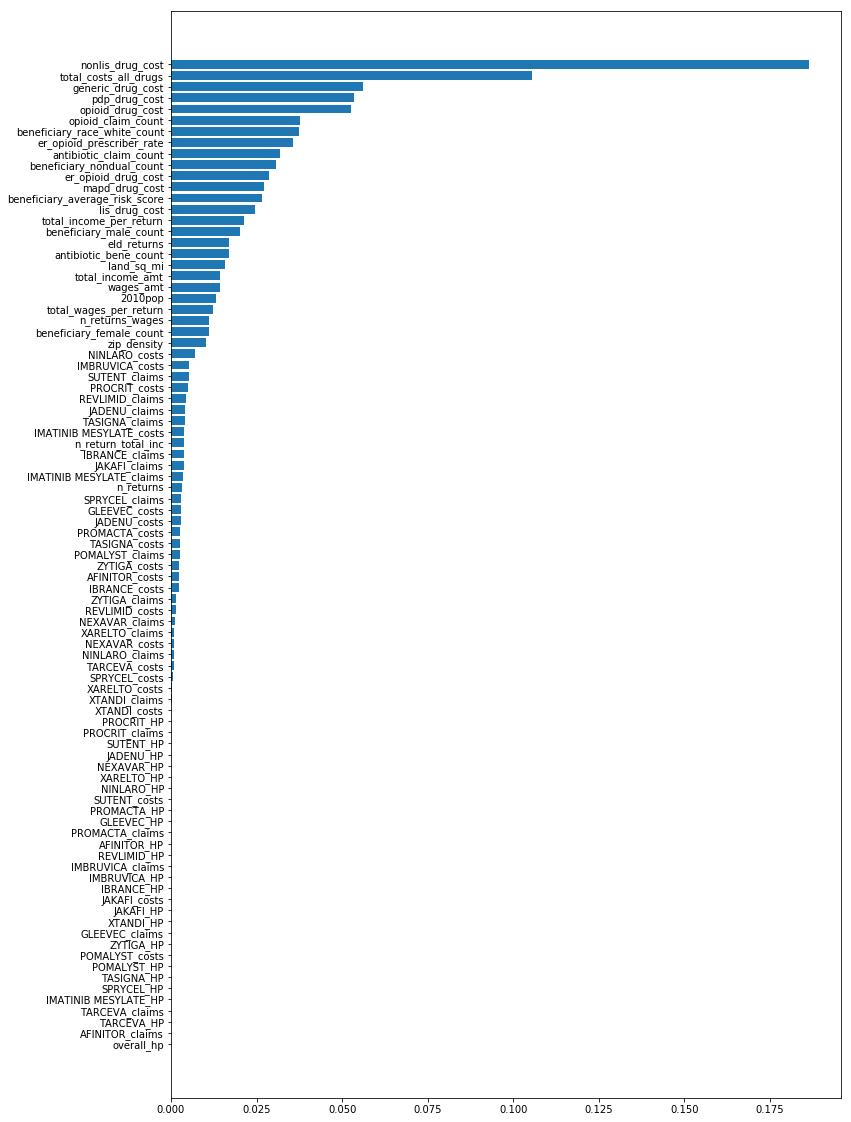

In [588]:
gbc = GradientBoostingClassifier()

print(cross_val_score(gbc, X, y, scoring='f1', cv=5).mean())
gbc.fit(X, y)

plot_feature_importances(gbc, X)

In [479]:
lm = LogisticRegression()
print(cross_val_score(lm, X, y, scoring='precision', cv=5).mean())

0.155281123832


In [485]:
rfc = RandomForestClassifier()
print(cross_val_score(rfc, X, y, scoring='f1', cv=5).mean())

0.105585244608


In [445]:
gbc = GradientBoostingClassifier()
gbc.fit(X, y)

#generate predicted probability
res_mat = gbc.predict(X).reshape(-1, 1)

i = 0
while i < 9:
    results_i = gbc.predict(X).reshape(-1, 1)
    res_mat = np.concatenate((res_mat, results_i), axis=1)
    i += 1
    
res_mat

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [451]:
X.shape

(11040, 78)

In [453]:
(gbc.predict(X) == 1).sum()

118

In [465]:
high_prob_npis = X[gbc.predict_proba(X)[:, 1] > 0.75].index.values

In [610]:
df[df.npi.isin(high_prob_npis)]

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,nppes_provider_zip5
15025,1811952591,ADAMS,PAUL,FLINT,MI,Hematology/Oncology,48503
15026,1811952591,ADAMS,PAUL,FLINT,MI,Hematology/Oncology,48503
15027,1811952591,ADAMS,PAUL,FLINT,MI,Hematology/Oncology,48503
15028,1811952591,ADAMS,PAUL,FLINT,MI,Hematology/Oncology,48503
15029,1811952591,ADAMS,PAUL,FLINT,MI,Hematology/Oncology,48503
15030,1811952591,ADAMS,PAUL,FLINT,MI,Hematology/Oncology,48503
15031,1811952591,ADAMS,PAUL,FLINT,MI,Hematology/Oncology,48503
15032,1811952591,ADAMS,PAUL,FLINT,MI,Hematology/Oncology,48503
15033,1811952591,ADAMS,PAUL,FLINT,MI,Hematology/Oncology,48503
15034,1811952591,ADAMS,PAUL,FLINT,MI,Hematology/Oncology,48503


In [672]:
npi_dict_15 = create_dictionary_npis('data/heme-onc_d_15.csv')
npi_dict_16 = create_dictionary_npis('data/heme-onc_d_16.csv')

In [3]:
import pickle

# save pickle

clf = gbc.fit(X, y)
path = 'src/model_imbruvica.pkl'
model_pkl = open(path, 'wb')
pickle.dump(clf, model_pkl)
model_pkl.close()

pickle.dump(npi_dict_15, open('src/npi_2015.pkl', 'wb'))
pickle.dump(npi_dict_16, open('src/npi_2016.pkl', 'wb'))

NameError: name 'gbc' is not defined

In [4]:
X_clean = clean_data('data/heme-onc_d_16.csv')
pickle.dump(X_clean, open('data/heme-onc_d_16_clean.pkl', 'wb'))

Reading file...
Creating new features...
Collapsing unecessary features...
Complete.


In [ ]:
pickle.load(open('src/model_imbruvica.pkl', 'rb', encoding='latin1'))

In [663]:
high_prob_npis

array([1811952591, 1861695678, 1427076736, 1043218316, 1093761124,
       1295701522, 1427266956, 1871607598, 1356332506, 1871577544,
       1720039126, 1093778458, 1164484614, 1841297702, 1184680399])

In [667]:
npi_dict_15[1811952591]

{'city': 'FLINT',
 'first_name': 'PAUL',
 'last_name': 'ADAMS',
 'speciality': 'Hematology/Oncology',
 'state': 'MI',
 'zip': 48503}

In [738]:
hp_dict = {k: npi_dict_15[k] for k in high_prob_npis}

In [712]:
prob_hp_arr = np.concatenate([X.index.values.reshape(-1,1), gbc.predict_proba(X)[:, 1].reshape(-1,1)], axis=1)
prob_hp_dict = {npi_prob[0]: npi_prob[1] for npi_prob in prob_hp_arr}

for npi in high_prob_npis:
    if npi in prob_hp_dict:
        hp_dict[npi]['prob'] = prob_hp_dict[npi]

In [737]:
hp_dict

{1043218316: {'city': 'HILTON HEAD ISLAND',
  'first_name': 'GARY',
  'last_name': 'THOMAS',
  'prob': 0.80937601698075567,
  'prob_hp': 0.80937601698075567,
  'speciality': 'Hematology',
  'state': 'SC',
  'zip': 29926},
 1093761124: {'city': 'KNOXVILLE',
  'first_name': 'WAHID',
  'last_name': 'HANNA',
  'prob': 0.75450736998723311,
  'prob_hp': 0.75450736998723311,
  'speciality': 'Hematology/Oncology',
  'state': 'TN',
  'zip': 37920},
 1093778458: {'city': 'POUGHKEEPSIE',
  'first_name': 'TAUSEEF',
  'last_name': 'AHMED',
  'prob': 0.5455233735799484,
  'speciality': 'Medical Oncology',
  'state': 'NY',
  'zip': 12601},
 1164484614: {'city': 'LITTLE ROCK',
  'first_name': 'BRAD',
  'last_name': 'BALTZ',
  'prob': 0.85685783925382708,
  'speciality': 'Hematology/Oncology',
  'state': 'AR',
  'zip': 72205},
 1184680399: {'city': 'LA JOLLA',
  'first_name': 'ALAN',
  'last_name': 'SAVEN',
  'prob': 0.65541787968856258,
  'speciality': 'Hematology/Oncology',
  'state': 'CA',
  'zip': 

In [720]:
prob_hp_df = pd.DataFrame(data=prob_hp_arr, columns=['npi', 'prob_hp']).set_index('npi')
prob_hp_df.head()

,prob_hp
npi,
1.285698e+09,0.034178
1.174529e+09,0.198828
1.811983e+09,0.090436
1.861516e+09,0.096127
1.194726e+09,0.021360


### Identified top prescribed correlated drugs from 2015 data that was also in 2016 data

In [20]:
def add_new_features2(data):

    #data.set_index('npi', inplace=True) #added this because index isn't npi when file read in

    npis = data.npi.values
    hp_features = pd.DataFrame(data=npis, columns=['npi']).set_index('npi')

    partd_drugs = ['REVLIMID', 
                   'IMBRUVICA', 
                   'IBRANCE', 
                   'JAKAFI', 
                   'XTANDI', 
                   'GLEEVEC',
                   'ZYTIGA', 
                   'POMALYST', 
                   'TASIGNA', 
                   'SPRYCEL', 
                   'IMATINIB MESYLATE',
                   'TARCEVA', 
                   'AFINITOR', 
                   'PROMACTA', 
                   'PROCRIT', 
                   'JADENU', 
                   'NEXAVAR',
                   'NINLARO', 
                   'SUTENT', 
                   'XARELTO',         
                   'DAPSONE',
                   'ARANESP',         
                   'GRANISETRON HCL',
                   'NEULASTA'
                  ]

    for drug in partd_drugs:
        features = data.loc[data['drug_name'] == 'REVLIMID', ['npi', 'total_drug_cost', 'total_claim_count']].set_index('npi')

        # Create high prescriber feature per drug
        drug_hp = drug + '_HP'
        features[drug_hp] = 0
        features.loc[features['total_drug_cost'] >= features['total_drug_cost'].quantile(0.75), drug_hp] = 1

        # rename columns
        drug_costs = drug + '_costs'
        drug_claims = drug + '_claims'
        features.rename(columns={'total_drug_cost': drug_costs, 'total_claim_count': drug_claims}, inplace=True)

        hp_features = hp_features.join(features)

    # add feature for all drug costs
    total_costs_all_drugs = pd.DataFrame(data=data.groupby('npi').sum()['total_drug_cost']).rename(columns={'total_drug_cost': 'total_costs_all_drugs'})
    hp_features = hp_features.join(total_costs_all_drugs)

    # add feature for high prescriber overall
    hp_features['overall_hp'] = 0
    hp_features.loc[hp_features['total_costs_all_drugs'] >= hp_features['total_costs_all_drugs'].quantile(0.75), 'overall_hp'] = 1

    hp_features.fillna(0, inplace=True)
    hp_features.drop_duplicates(inplace=True)
    hp_features.reset_index(inplace=True)

    return hp_features

In [21]:
def clean_data2(filename):

    print('Reading file...')
    data = pd.read_csv(filename, delimiter='\t')

    # add new features before columns are dropped
    print('Creating new features...')
    new_features = add_new_features2(data)

    print('Collapsing unecessary features...')
    data = data[['npi', 'nppes_provider_zip5', 'generic_drug_cost', 'mapd_drug_cost', 'pdp_drug_cost', 'lis_drug_cost',
       'nonlis_drug_cost', 'opioid_claim_count', 'opioid_drug_cost',
       'er_opioid_drug_cost', 'er_opioid_prescriber_rate',
       'beneficiary_female_count', 'beneficiary_male_count',
       'beneficiary_average_risk_score',
       'antibiotic_claim_count',
       'antibiotic_bene_count', 'beneficiary_race_white_count','beneficiary_nondual_count']]
    data = data.drop_duplicates()

    # Fill null values from cost columns with median cost
    cols_fillna = ['generic_drug_cost', 'mapd_drug_cost', 'pdp_drug_cost', 'lis_drug_cost',
                  'nonlis_drug_cost', 'opioid_drug_cost', 'er_opioid_drug_cost', 'er_opioid_prescriber_rate']
    for col in cols_fillna:
        data[col].fillna(data[col].median(), inplace=True)

    # Fill null values from count columns with random numbers between 0-10
    cols_fillna = ['opioid_claim_count', 'beneficiary_female_count', 'beneficiary_average_risk_score',
                  'beneficiary_male_count', 'antibiotic_claim_count', 'antibiotic_bene_count',
                  'beneficiary_race_white_count', 'beneficiary_nondual_count']
    for col in cols_fillna:
        mask = data[col].isnull()
        data.loc[mask, col] = data.loc[mask, col].apply(lambda v: np.random.choice(range(1,11)))


    # Add additional data from IRS and 2010 Census on zipcode demographics
    # Data processed in zipcode_data.ipynb
    zip_data = pd.read_csv('data/zip_data.csv', delimiter='\t')
    zip_data = zip_data.iloc[:,1:]  # drop unnamed column
    zip_data.drop(['agi', 'agi_stub'], axis=1, inplace=True)

    # rename Imbruvica zipcode5 column to merge with zipcode data
    data.rename(columns={'nppes_provider_zip5': 'zip'}, inplace=True)

    # merge zipcode demographic data and new features data into Medicare data
    data = pd.merge(data, zip_data, on='zip')
    data.drop('zip', axis=1, inplace=True)

    data = pd.merge(data, new_features, how='left')
    data.fillna(0, inplace=True) #fillna created from new_features join

    data.set_index('npi', inplace=True)
    print('Complete.')

    return data

In [22]:
data_15 = clean_data2('data/heme-onc_d_15.csv')

Reading file...
Creating new features...
Collapsing unecessary features...
Complete.


In [23]:
labels = get_high_prescribers('data/heme-onc_d_16.csv', 'IMBRUVICA')

In [24]:
X, y = get_Xy(data_15, labels)

In [25]:
X.head()

,generic_drug_cost,mapd_drug_cost,pdp_drug_cost,lis_drug_cost,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,er_opioid_drug_cost,er_opioid_prescriber_rate,beneficiary_female_count,...,ARANESP_claims,ARANESP_HP,GRANISETRON HCL_costs,GRANISETRON HCL_claims,GRANISETRON HCL_HP,NEULASTA_costs,NEULASTA_claims,NEULASTA_HP,total_costs_all_drugs,overall_hp
npi,,,,,,,,,,,,,,,,,,,,,
1285697821,293020.90,89993.76,859998.42,562690.94,387301.24,788.0,16607.06,10623.12,169.0,260.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,741836.26,0.0
1174528921,34999.29,232360.85,1220401.33,102602.37,1350159.81,55.0,10884.48,373.52,18.0,74.0,...,25.0,0.0,236215.81,25.0,0.0,236215.81,25.0,0.0,1333817.20,1.0
1811982689,43351.34,110119.91,814494.50,13834.62,910779.79,100.0,4998.43,2230.50,41.0,99.0,...,11.0,0.0,107005.88,11.0,0.0,107005.88,11.0,0.0,799978.00,0.0
1861515546,44482.47,115583.76,1021989.16,197520.53,940052.39,219.0,9937.22,856.03,17.0,184.0,...,29.0,0.0,275264.42,29.0,0.0,275264.42,29.0,0.0,736672.45,0.0
1194725671,15418.47,227291.32,349729.33,33164.02,543856.63,119.0,9066.19,673.87,15.0,72.0,...,12.0,0.0,133624.45,12.0,0.0,133624.45,12.0,0.0,506922.97,0.0


In [28]:
print(cross_val_score(gbc, X, y, scoring='f1', cv=5).mean())

0.110239757896


0.107668354377


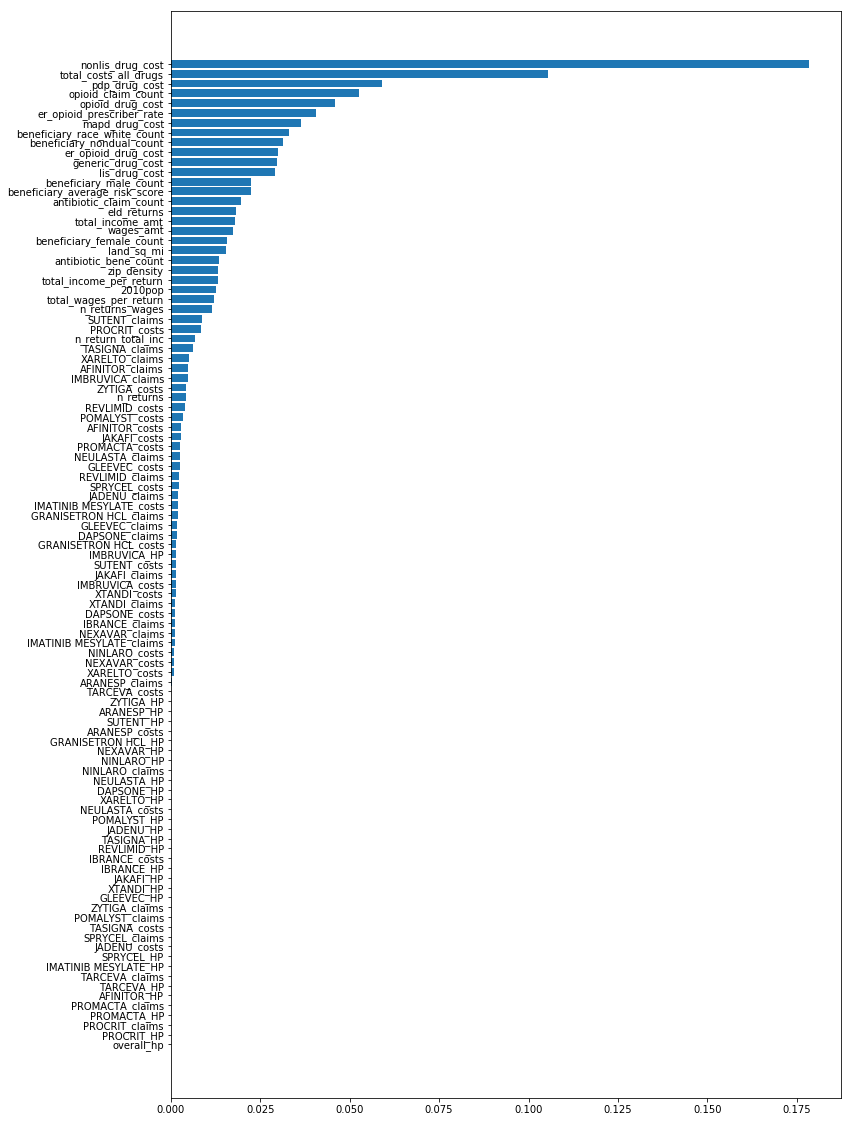

In [27]:
gbc = GradientBoostingClassifier()

print(cross_val_score(gbc, X, y, scoring='f1', cv=5).mean())
gbc.fit(X, y)

plot_feature_importances(gbc, X)